   # Projeto 2 - Ciência do Dados
___

   ## Arthur Pansini; Enzo Fonteyne; Andre Faia.

<div id="introducao"></div>

## Introdução
<div id="apreobs"></div>

### Apresentação e Objetivos
Nosso projeto é focado na industria automobilistica, na qual utilizamos das variaveis ano de fabricação, modelo, tipo de câmbio e quilometros rodados para analizar quais dessas caracteristicas estão mais presentes em carros vendidos acima dos 20 mil dolares. Buscamos trazer uma base de dados ampla e com enorme diversidade de informações acerca do tema, para que se aproxime o maximo possível da realidade!

<div id="biblio"></div>

### Bibliotecas 

Para iniciar o desenvolvimento do projeto, devemos primeiramente importar algumas bibliotecas essenciais. Para as operações com a base de dados, utilizaremos a biblioteca Pandas para manipulação e análise de dados. Ademais, também utilizaremos a biblioteca de análise preditiva de dados Scikit-Learn (sklearn), da qual extrairemos algumas funções para geração dos modelos de regressão e, para a exibição dos dados e operações numéricas, utilizaremos as bilbiotecas matplotlib.pyplot e numpy, respectivamente. Além disso, utilizaremos a biblioteca Seaborn para produzir comparações visuais entre as variáveis. Todas as bibliotecas que serão utilizadas no projeto estão inseridas na célula abaixo, de forma a facilitar e tornar mais fluida a leitura do trabalho, não havendo necessidade de rodar células extras posteriormente.

In [177]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Para ter melhor print
from IPython.display import display

In [178]:
data = pd.read_csv("carros.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Agora que ja encontramos e definimos a nossa base de dados precisamos saber um pouco mais sobre ela e já começar a fazer algumas alterações para melhorar a nossa análise! Como estamos trabalhando com um target quantitativo é ideal que trabalhemos apenas com variáveis quantitativas, sendo assim teremos que retirar ou alterar algumas colunas para podermos implementá-las na análise.

In [179]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [180]:
data.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

Agora que já temos um panorama inicial dos nosso dados vamos começar retirando algumas informações qualitativas que não iremos utilizar no nosso projeto.

In [181]:
filtro = data.loc[:,["Price", "Prod. year","Gear box type", "Mileage", 'Cylinders', 'Leather interior',
                    'Engine volume', 'Airbags']]

Selecionando apenas as variáveis quantitativas e algumas qualitativas, que iremos alterar para poder utilizá-las no projeto, podemos vizualiar a nova base de dados que será utilizada

In [182]:
filtro

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags
0,13328,2010,Automatic,186005 km,6.0,Yes,3.5,12
1,16621,2011,Tiptronic,192000 km,6.0,No,3,8
2,8467,2006,Variator,200000 km,4.0,No,1.3,2
3,3607,2011,Automatic,168966 km,4.0,Yes,2.5,0
4,11726,2014,Automatic,91901 km,4.0,Yes,1.3,4
...,...,...,...,...,...,...,...,...
19232,8467,1999,Manual,300000 km,4.0,Yes,2.0 Turbo,5
19233,15681,2011,Tiptronic,161600 km,4.0,Yes,2.4,8
19234,26108,2010,Automatic,116365 km,4.0,Yes,2,4
19235,5331,2007,Automatic,51258 km,4.0,Yes,2,4


Antes de começar as manipulações precisamos conferir se todas as linhas estão completas, ou seja, verificar se não existem valores nulos na base de dados!

In [183]:
filtro.isnull().sum()

Price               0
Prod. year          0
Gear box type       0
Mileage             0
Cylinders           0
Leather interior    0
Engine volume       0
Airbags             0
dtype: int64

Parece que está tudo certo! Vamos continuar!

<div id="limpexp"></div>

# Limpeza  e Análise Exploratória

Nesse passo iremos realizar as manipulações necessárias para que seja possível tirar alguma conclusão da nossa base de dados. Primeiramente, como temos duas variáveis qualitativas, devemos transformá-las em variáveis dummy.

Uma variável dummy é aquela que toma valor 0 ou 1 para indicar a falta ou presença de um fator categórico que possa vir a mudar o resultado de uma análise. Elas podem ser vistas como representações numéricas de fatores qualitativos em um modelo de regressão, como é o caso deste projeto, dividindo uma variável em categorias opostas, como seria o caso da transmissão de um veículo: manual ou automático. A variável dummy que assume valor zero, indicará que aquela não exerce nenhum papel em influenciar o resultado do target (variável dependente). Por outro lado, quando esta assume valor 1, terá o efeito contrário.

No primeiro caso de substituição por dummies, temos a coluna `Gear box type`. Essa coluna, por sua vez possui 3 valores: Manual automatic, Triptonic e Variator. Dessa forma, ao transformarmos a coluna em dummy, utilizando a função `pd.get_dummies()` do pandas, iremos criar quatro novas colunas, uma para cada valor distinto da coluna. Assim cada linha será associada com um valor 0 ou 1 em cada uma das colunas, sendo que se é atribuido o valor 1 a uma dessas colunas, automaticamente o valor 0 é atribuído às demais.

Iremos realizar o mesmo procedimentos também com a coluna `Leather interior`, mas nesse caso criaremos apenas mais duas colunas, uma Yes e outra No, indicando em cada caso se o carro tem interior de couro ou não.

Para dar continuidade a nossa limpeza vamos dar mais uma olhada detalhada na nossa base de dados.

In [184]:
filtro.describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


Como podemos ver alguns valores como o Preço e o ano de produção variam muito, então para melhorar o nosso código vamos restringir esse valores atendendo aos objetivos do projeto. Como queremos prever o preço de venda de um carro popular vamos começar restringindo a coluna de preço, para que tenhamos apenas carros de 10mil a 120mil dólares, o que classificamos como carros populares, além disso vamos selecionar apenas carros que foram fabricados apartir de 2005, uma vez que queremos evitar carros de colecionadores na nossa análise. Carros de colecionadores são carros antigos de alta quilometragem mas que possuem um valor alto de venda, esse tipo de veículo atrapalha a nossa análise pois são pontos muito fora da curva.

In [185]:
data1 = (filtro.loc[filtro['Price']>=10000])
data1 = (data1.loc[filtro['Price']<=120000])
data1 = (data1.loc[filtro['Prod. year']>=2005])

Pronto agora já selecionamos todas as colunas e linhas com que iremos trabalhar! Agora vamos realizar a limpeza dos caractéres nessas linhas e colunas!

In [186]:
data1.describe()

,Price,Prod. year,Cylinders,Airbags
count,10868.000000,10868.000000,10868.000000,10868.000000
mean,25700.440099,2012.829591,4.466323,6.468808
std,16004.684362,3.103390,1.127579,3.825282
min,10000.000000,2005.000000,1.000000,0.000000
25%,15053.000000,2011.000000,4.000000,4.000000
50%,20247.000000,2013.000000,4.000000,4.000000
75%,31245.750000,2015.000000,4.000000,10.000000
max,119172.000000,2020.000000,16.000000,16.000000


In [187]:
data1.head()

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags
0,13328,2010,Automatic,186005 km,6.0,Yes,3.5,12
1,16621,2011,Tiptronic,192000 km,6.0,No,3,8
4,11726,2014,Automatic,91901 km,4.0,Yes,1.3,4
5,39493,2016,Automatic,160931 km,4.0,Yes,2,4
9,26657,2007,Automatic,128500 km,6.0,Yes,3.5,12


**Limpando a coluna Mileage**

Primeiro vamos limpar a coluna `Mileage`, para podermos trabalhar com essa coluna ela precisar ser quantitativa, para isso precisamos retiarar o 'km' escrito no final de cada cédula!

In [188]:
data1['Mileage'] = data['Mileage'].map(lambda x: x.lstrip('+-').rstrip(' km'))
data1['Mileage'] = data1['Mileage'].astype('int64')

Pronto! Já retiramos o 'km' e transformamos a coluna em 'int64' para podermos utilizá-la como uma variável quantitativa.

Agora que a coluna `Mileage` é quantitativa podemos realizar mais um limpeza nela, e selecionar apenas os veículos com menos de 500mil km, estamos fazendo isso pois existem alguns veículos nessa base de dados com quilometragens absurdas como 2 milhões de quilometros rodados e, como já dito anteriormente, queremos evitar esse 'casos' fora da curva.

In [189]:
data1 = (data1.loc[data1['Mileage']<=500000])

Vamos começar a transformar as variáveis qualitativas em dummies! Como explicado anteriormente, tranformar uma variável qualitativa em dummy significa atribuir um valor 0 ou 1 para indicar a falta ou a presença de uma valor categórico, para isso uma nova coluna para cada categoria será criada, onde em apenas uma dessa novas colunas o valor 1 será atribuído, indicando a presença do valor categórico, e à todas as outras o valor 0 será atribuído.

In [190]:
gear = pd.get_dummies(data1['Gear box type'])
interior = pd.get_dummies(data1['Leather interior'])

In [191]:
data1 = pd.concat([data1, gear], axis=1)
data1 = pd.concat([data1, interior], axis=1)
data1.head()

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
0,13328,2010,Automatic,186005,6.0,Yes,3.5,12,1,0,0,0,0,1
1,16621,2011,Tiptronic,192000,6.0,No,3,8,0,0,1,0,1,0
4,11726,2014,Automatic,91901,4.0,Yes,1.3,4,1,0,0,0,0,1
5,39493,2016,Automatic,160931,4.0,Yes,2,4,1,0,0,0,0,1
9,26657,2007,Automatic,128500,6.0,Yes,3.5,12,1,0,0,0,0,1


Se ainda ficou alguma dúvida à respeitos das variáveis dummies vamos explicar melhor utilizando os resultados obtidos como exemplo! Como podemos ver na cédula acima, foram adicionadas 6 novas colunas ao nosso dataset, quatro referetes ao `Gear box type` e duas referentes ao `Leather interior`. Vamos pegar como exemplo a primeira linha! Como podemos ver, o `Gear box type` desse carro é 'Automatic', por isso no temos na coluna `Automatic` o valor 1, e nas demais (Manual, Tiptronic e Variator), o valor 0. Ademais, na coluna `Leather interior`, o dataset nos informa que o interior do carro é de couro, sendo assim, temos no final do nosso dataset o valor 1 atribuído à coluna `Yes` e o valor 0 atribuído à coluna `No`.

**Limpando a coluna Engine volume**

Agora vamos limpar a coluna `Engine volume`, temos que limpar essa colunas pois alguns carros tem a classificação 'Turbo', para podermos trabalhar com esses valores precisamos transformar essa variável em 'float64', e para isso precisamos retirar qualquer escrita.

In [192]:
data1['Engine volume'] = data1['Engine volume'].map(lambda x: x.lstrip('+-').rstrip(' Turbo'))
data1['Engine volume'] = data1['Engine volume'].astype('float64')

Ufa! Finalmente terminamos as limpezas do nosso dataset e podemos partir para a análise exploratória! Vamos só dar mais uma olhada de como ficou o nosso dataset depois de todas essa alterações!

In [194]:
data1.head()

,Price,Prod. year,Gear box type,Mileage,Cylinders,Leather interior,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
0,13328,2010,Automatic,186005,6.0,Yes,3.5,12,1,0,0,0,0,1
1,16621,2011,Tiptronic,192000,6.0,No,3.0,8,0,0,1,0,1,0
4,11726,2014,Automatic,91901,4.0,Yes,1.3,4,1,0,0,0,0,1
5,39493,2016,Automatic,160931,4.0,Yes,2.0,4,1,0,0,0,0,1
9,26657,2007,Automatic,128500,6.0,Yes,3.5,12,1,0,0,0,0,1


<div id="testtrain"></div>

### Criando base de teste e treinamento

Antes de iniciarmos a análise exploratória vamos primeiro separar a nossa base de dados em treinamento e teste. Como você já deve ter imaginado, a base de treinamento serve para treinar o algoritmo de previsão, ou seja, entregamos ao algoritmo uma parte da nossa base de dados para ele analisar padrões e correlações entre as variáveis, para que depois, com base no que ele 'aprendeu' o algoritmo possa prever resultados, essas previsões serão comparadas com a base de teste, deste modo teremos um feedback da eficiência do nosso modelo.
Para realizar essa separação iremos utilizar a função `train_test_split` importada da biblioteca ScikitLearn. Como queremos melhorar o desempenho do nosso modelo vamos separar 80% dos dados para a base de treinamento, e 20% para a base de testes, desta forma o poderemos treinar bastante o nosso modelo, o que irá contribuir positivamente na qualidade da previsão.

In [213]:
dados_treinamento, dados_teste = train_test_split(data1, test_size=0.2, random_state=50)

Após a separação vamos dar uma olhada para ver se as bases de dados estão parecidas!

In [214]:
dados_treinamento.describe()

,Price,Prod. year,Mileage,Cylinders,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
count,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000
mean,25878.256181,2012.831225,122575.629019,4.471735,2.250226,6.483923,0.684852,0.049216,0.217411,0.048520,0.258851,0.741149
std,16144.876907,3.094154,78776.947942,1.131625,0.838823,3.827933,0.464602,0.216332,0.412509,0.214875,0.438029,0.438029
min,10000.000000,2005.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15251.000000,2011.000000,65711.000000,4.000000,1.800000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20297.000000,2013.000000,112000.000000,4.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31361.000000,2015.000000,162000.000000,4.000000,2.500000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,119172.000000,2020.000000,500000.000000,16.000000,20.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
dados_teste.describe()

,Price,Prod. year,Mileage,Cylinders,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
count,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000
mean,25506.564531,2012.807799,122555.467502,4.452182,2.224791,6.461931,0.663417,0.059424,0.224234,0.052925,0.262303,0.737697
std,15550.670890,3.133241,76688.298867,1.111017,0.771634,3.839764,0.472651,0.236472,0.417174,0.223935,0.439988,0.439988
min,10000.000000,2005.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14834.000000,2011.000000,68000.000000,4.000000,1.800000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20385.000000,2013.000000,117000.000000,4.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31361.000000,2015.000000,161579.500000,4.000000,2.500000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,119172.000000,2020.000000,496592.000000,14.000000,6.200000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como podemos ver as duas bases de dados estão bem parecidas! Isso aconteceu porque os dados foram embaralhados antes de serem separados. Com excessão da linha `count`, todos os outros valores estão bem parecios! Lembrando que a divergência na linha count já era esperada pois as bases de dados têm tamanhos diferentes!

<div id="analise"></div>

## Análise exploratória

Pronto! Finalmente podemos começar a nossa análise exploratória!

Nessa etapa vamos analisar as relações entre cada uma das variáveis da base de dados. Essa análise serve para podermos encontrar as variáveis que mais influenciam a nossa variável target. Dessa forma, podemos aperfeiçoar o nosso modelo fazendo ele focar apenas nas variáveis mais relevantes e ignorando algumas que podem atrapalhá-lo! Para isso vamos utilizar a fnção `pairplot()` da biblioteca seaborn. Essa função nos ajuda a visualizar graficamente a influência de uma variável na outra! 

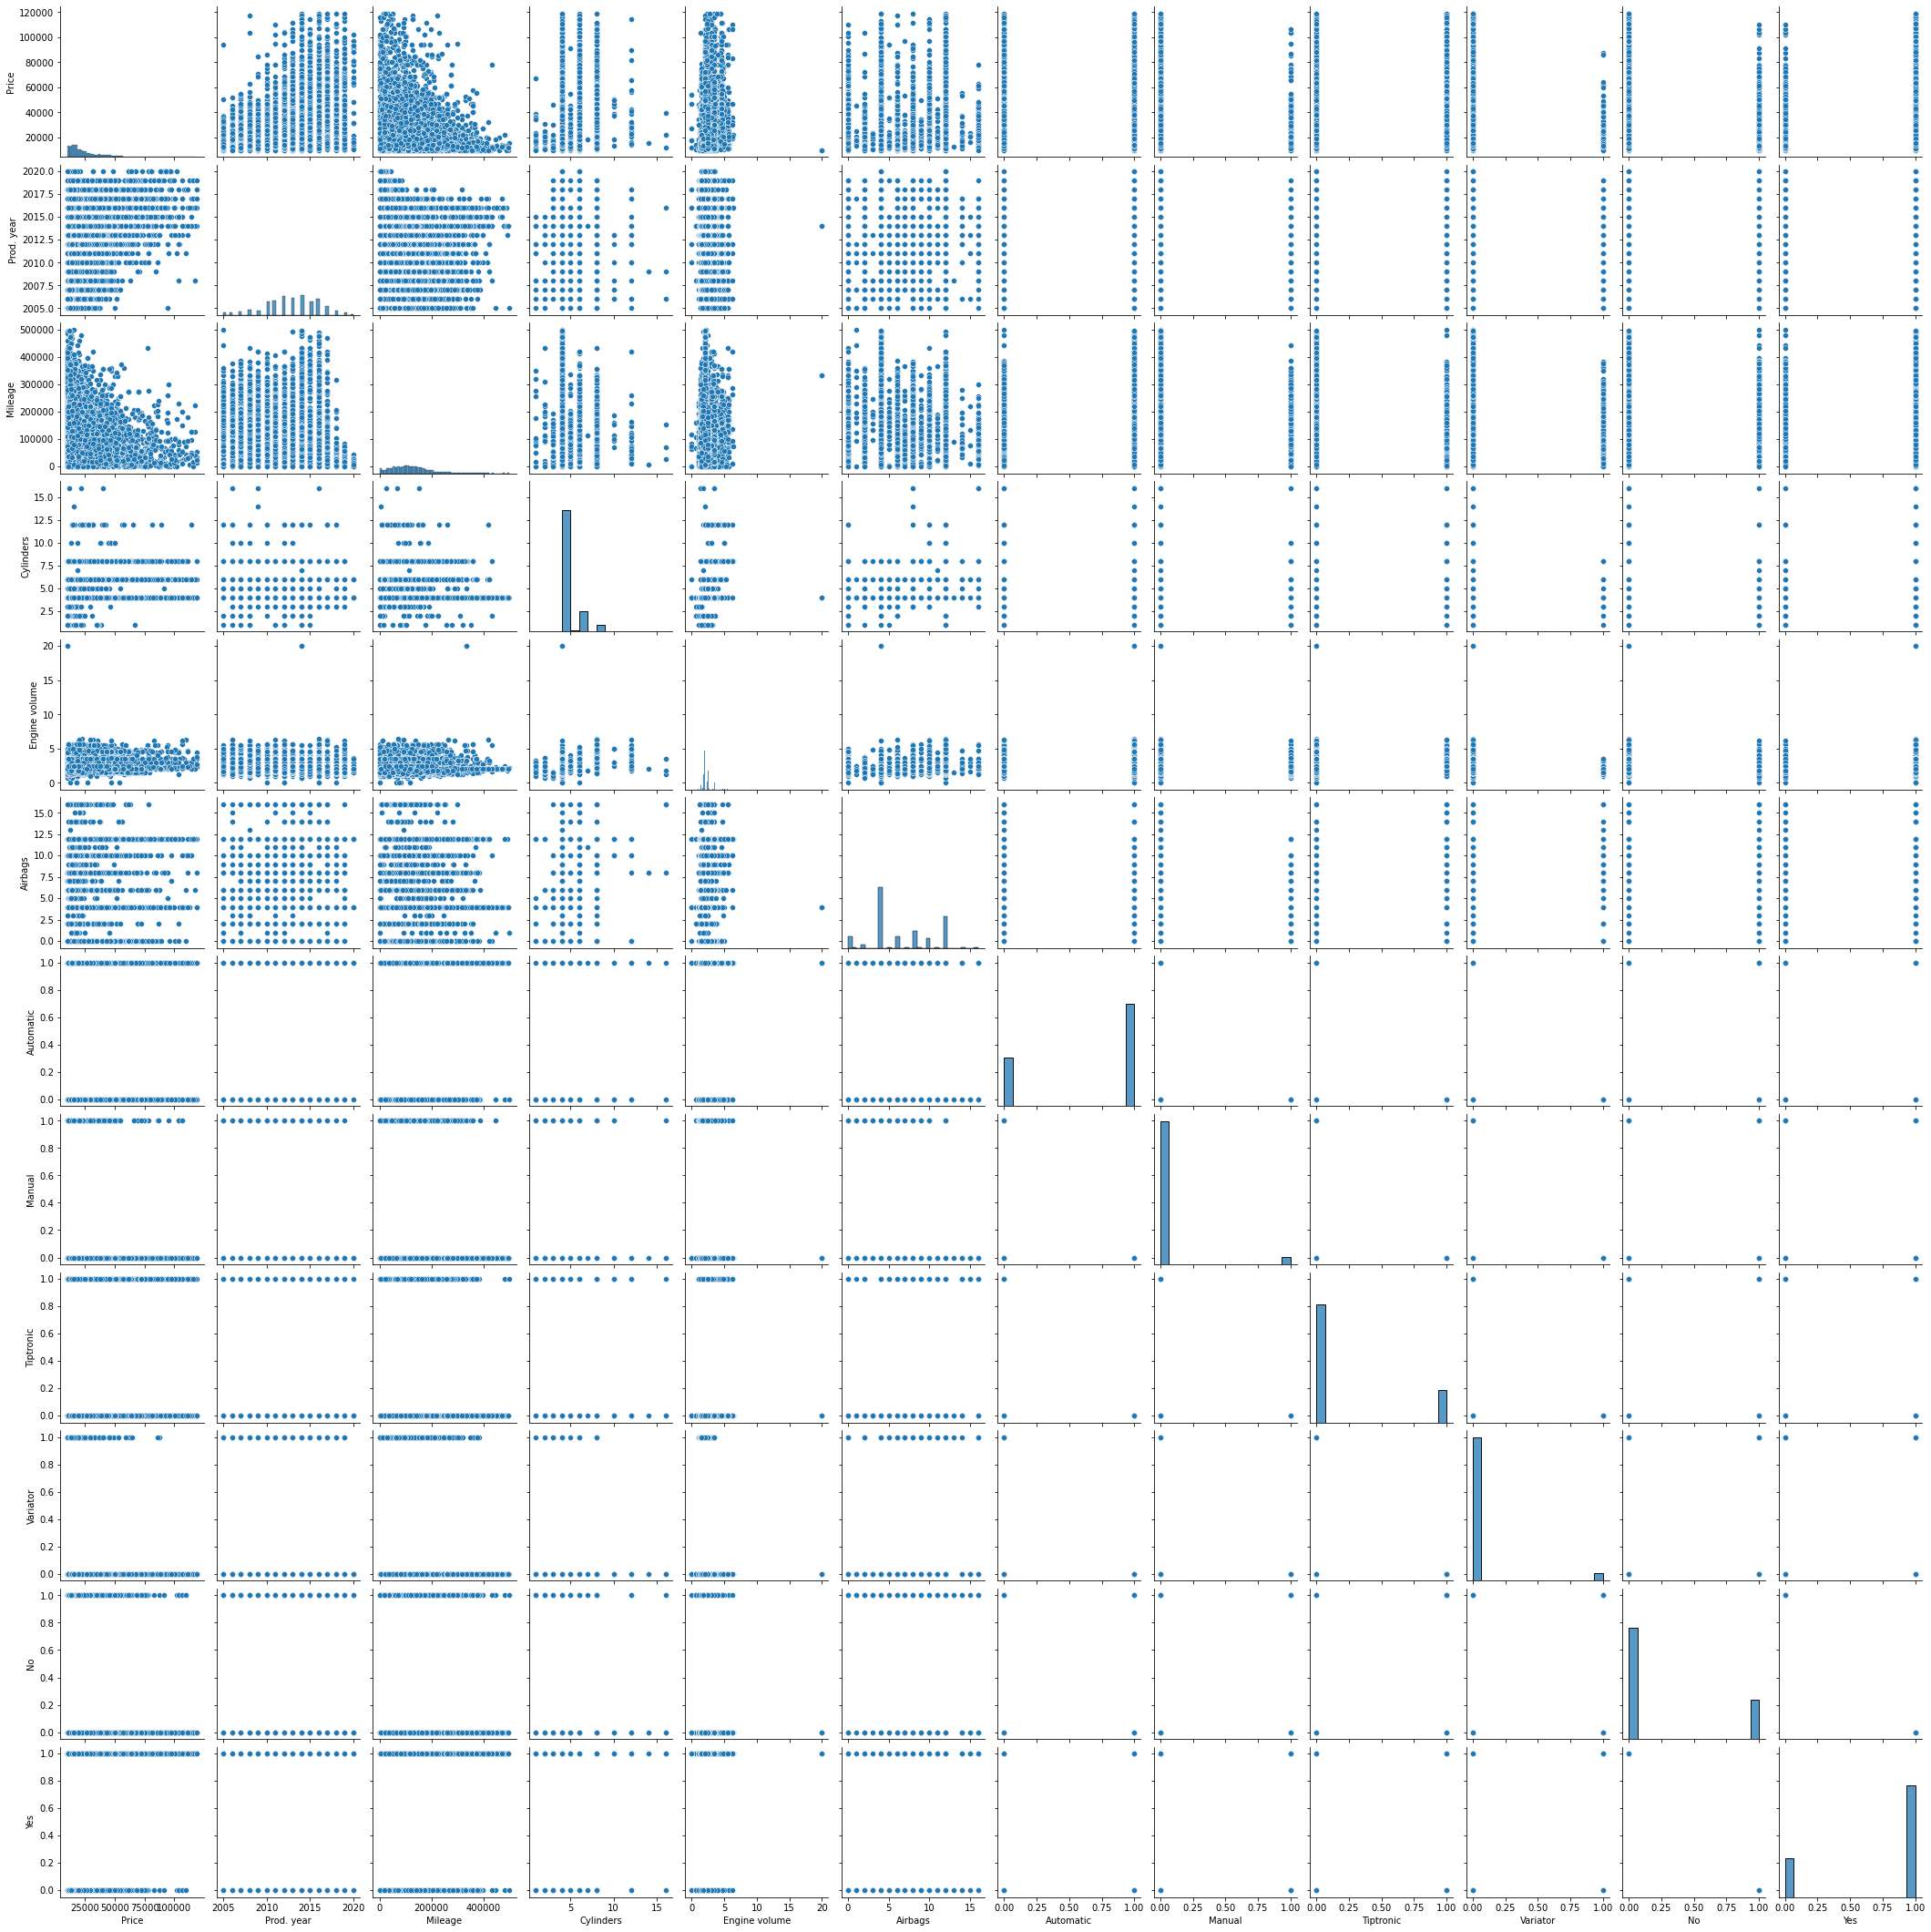

In [216]:
sns.pairplot(data1)

Hmm, esse monte de gráfico pequeno não está nos ajudando muito a tirar alguma conclusão dessas comparações né?

Bom, como o objetivo do nosso projeto é prever o preço de um carro popular com base em diversas variáveis vamos fazer um novo `pairplot()` focando agora no que realmente interessa, vamos plotar gráficos que mostram a influência das demais variáveis apenas na nossa variável target!

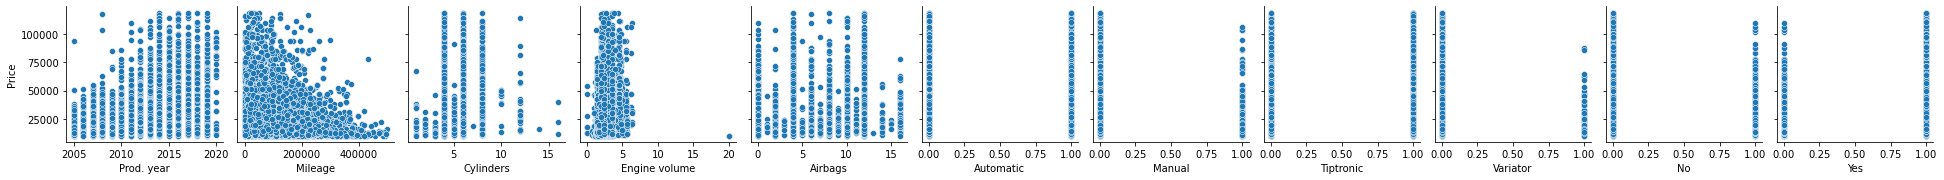

In [217]:
sns.pairplot(data1, x_vars=["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes',], y_vars=['Price'])

In [198]:
data1.dtypes

Price                 int64
Prod. year            int64
Gear box type        object
Mileage               int64
Cylinders           float64
Leather interior     object
Engine volume       float64
Airbags               int64
Automatic             uint8
Manual                uint8
Tiptronic             uint8
Variator              uint8
No                    uint8
Yes                   uint8
dtype: object

In [199]:
data1.describe()

,Price,Prod. year,Mileage,Cylinders,Engine volume,Airbags,Automatic,Manual,Tiptronic,Variator,No,Yes
count,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000,10769.000000
mean,25803.910948,2012.826539,122571.596341,4.467824,2.245139,6.479525,0.680565,0.051258,0.218776,0.049401,0.259541,0.740459
std,16027.765422,3.101879,78360.110369,1.127509,0.825849,3.830134,0.466280,0.220534,0.413436,0.216714,0.438403,0.438403
min,10000.000000,2005.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15060.000000,2011.000000,66000.000000,4.000000,1.800000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20382.000000,2013.000000,112523.000000,4.000000,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31361.000000,2015.000000,162000.000000,4.000000,2.500000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,119172.000000,2020.000000,500000.000000,16.000000,20.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
X_treinamento = dados_treinamento[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_treinamento = dados_treinamento['Price']


X_teste = dados_teste[["Prod. year", "Mileage", 'Cylinders',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_teste = dados_teste['Price']

In [202]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [203]:
resultados = regress(Y_treinamento,X_treinamento)
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     512.2
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:15:22   Log-Likelihood:                -93850.
No. Observations:                8615   AIC:                         1.877e+05
Df Residuals:                    8605   BIC:                         1.878e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.561e+06   6.07e+04    -42.176      0.000   -2.68e+06   -2.44e+06
Prod. year     2232.8762     52.729     42.346      0.000    2129.514    2336.238
Mileage          -0.0294      0.002    -14.868      0.000      -0.033      -0.026
Cylinders      1944.1638    182.172     10.672      0.000    1587.064    2301.264
Engine volume  5097.5390    248.411     20.521      0.000    4610.595    5584.483
Airbags        -437.7417     40.655    -10.767      0.000    -517.435    -358.048
Automatic     -6.441e+05   1.53e+04    -42.226      0.000   -6.74e+05   -6.14e+05
Manual        -6.363e+05   1.51e+04    -42.097      0.000   -6.66e+05   -6.07e+05
Tiptronic     -6.394e+05   1.52e+04    -42.065      0.000   -6.69e+05    -6.1e+05
Variator      -6.408e+05   1.52e+04    -42.249      0.000   -6.71e+05   -6.11e+05
No            -1.283e+06   3.03e+04    -42.290      0.000   -1.34e+06   -1.22e+06
Yes           -1.278e+06   3.04e+04    -42.062      0.000   -1.34e+06   -1.22e+06
==============================================================================
Omnibus:                     2507.484   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14416.777
Skew:                           1.273   Prob(JB):                         0.00
Kurtosis:                       8.804   Cond. No.                     4.63e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [204]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = data1
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

#Função retirada do link https://www.kaggle.com/sauravvsrinku/starter-house-sales-in-king-county-8ceb15de-5

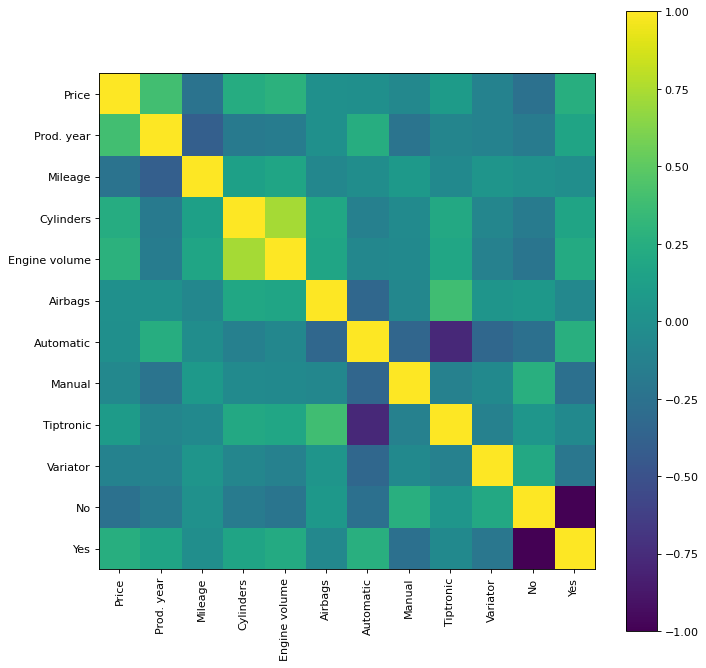

In [205]:
plotCorrelationMatrix(data1, 10)

In [206]:
# Com base na malha acima escolhemos as variaveis Prod. year e Cylinders para realizar o grafico 3D

In [207]:
X_treinamento_restringido = dados_treinamento[["Prod. year", 'Mileage',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_treinamento = dados_treinamento['Price']

resultados_treinamento = regress(Y_treinamento,X_treinamento_restringido)
resultados_treinamento.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     554.7
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:15:29   Log-Likelihood:                -93906.
No. Observations:                8615   AIC:                         1.878e+05
Df Residuals:                    8606   BIC:                         1.879e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.504e+06   6.09e+04    -41.129      0.000   -2.62e+06   -2.38e+06
Prod. year     2185.5134     52.886     41.325      0.000    2081.845    2289.182
Mileage          -0.0294      0.002    -14.765      0.000      -0.033      -0.026
Engine volume  6893.7507    183.897     37.487      0.000    6533.269    7254.232
Airbags        -410.9579     40.843    -10.062      0.000    -491.019    -330.896
Automatic     -6.299e+05   1.53e+04    -41.186      0.000    -6.6e+05      -6e+05
Manual        -6.222e+05   1.52e+04    -41.051      0.000   -6.52e+05   -5.92e+05
Tiptronic     -6.249e+05   1.52e+04    -41.008      0.000   -6.55e+05   -5.95e+05
Variator      -6.266e+05   1.52e+04    -41.203      0.000   -6.56e+05   -5.97e+05
No            -1.254e+06   3.04e+04    -41.243      0.000   -1.31e+06   -1.19e+06
Yes           -1.249e+06   3.05e+04    -41.013      0.000   -1.31e+06   -1.19e+06
==============================================================================
Omnibus:                     2570.812   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22499.035
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                      10.558   Cond. No.                     1.58e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [208]:
X_teste_restringido = dados_teste[["Prod. year", 'Mileage',
                    'Engine volume', 'Airbags', 'Automatic', 'Manual', 'Tiptronic', 'Variator', 'No', 'Yes']]
Y_teste = dados_teste[['Price']]
X_teste_completo = sm.add_constant(X_teste_restringido)
Y_previsto = resultados_treinamento.predict(X_teste_completo)

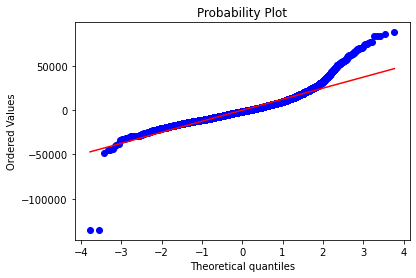

In [209]:
residuos = resultados_treinamento.resid

plt.figure(figsize=(6,4))
probplot(residuos, dist='norm', plot=plt);

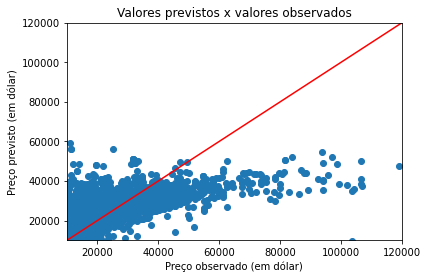

In [210]:
plt.scatter(Y_teste,Y_previsto)
plt.plot([10000,120000],[10000,120000], color='red')
plt.title('Valores previstos x valores observados')
plt.ylabel('Preço previsto (em dólar)')
plt.xlabel('Preço observado (em dólar)')
plt.xlim(10000,120000)
plt.ylim(10000,120000)
plt.show()

In [212]:
print(f"Score da regressão linar calculado por R^2 = {r2_score(Y_teste, Y_previsto)}")

Score da regressão linar calculado por R^2 = 0.32095666021382285


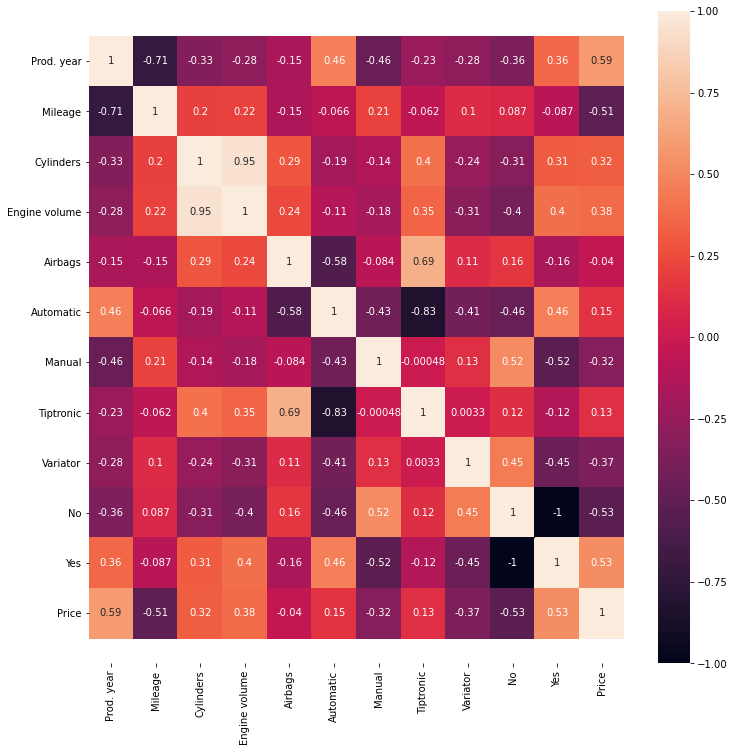

In [161]:
correlations = pd.concat([X_treinamento, pd.Series(Y_treinamento)], axis=1).corr()

plt.figure(figsize=(12,12))
df_corr = correlations.corr()
ax = sns.heatmap(df_corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib

In [162]:
Y = data1[['Price']]
X = data1[["Prod. year", 'Mileage']]
results = regress(Y,X)

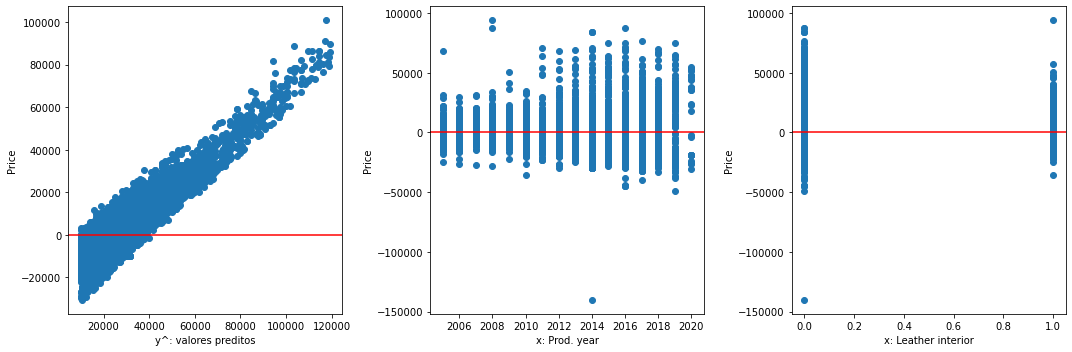

In [163]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(Y, results.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel('y^: valores preditos')



plt.subplot(133)
plt.scatter(X_treinamento_restringido.iloc[:,8], resultados_treinamento.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel(f'x: Leather interior')



plt.subplot(132)
plt.scatter(X_treinamento_restringido.iloc[:,0], resultados_treinamento.resid);
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('Price')
plt.xlabel(f'x: {list(X_treinamento_restringido)[0]}')



plt.tight_layout()
plt.show()

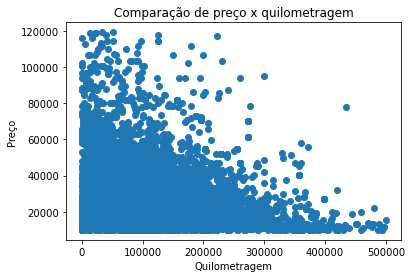

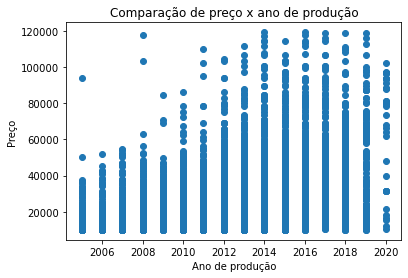

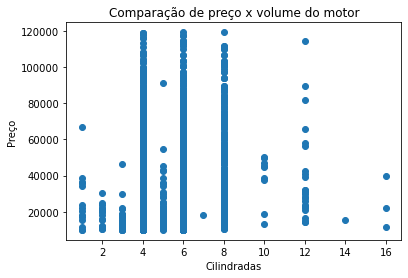

In [164]:
plt.scatter(data1['Mileage'], data1['Price'])
plt.title('Comparação de preço x quilometragem')
plt.ylabel('Preço')
plt.xlabel('Quilometragem')
plt.show()
 
plt.scatter(data1['Prod. year'], data1['Price'])
plt.title('Comparação de preço x ano de produção')
plt.ylabel('Preço')
plt.xlabel('Ano de produção')
plt.show()
 
plt.scatter(data1['Cylinders'], data1['Price'])
plt.title('Comparação de preço x volume do motor')
plt.ylabel('Preço')
plt.xlabel('Cilindradas')
plt.show()

In [218]:
#Uso do PlynomialFeatures
passo_inicial = PolynomialFeatures(degree=5)

X1 = data1.Price.to_numpy().reshape(len(data1.Price.to_numpy()), 1)
Y1 = data1.Yes.to_numpy().reshape(len(data1.Mileage.to_numpy()), 1)



#Transformando a variável dependente
polinomial_X1 = passo_inicial.fit_transform(X1)



polinomial_X1

array([[1.00000000e+00, 1.33280000e+04, 1.77635584e+08, 2.36752706e+12,
        3.15544007e+16, 4.20557053e+20],
       [1.00000000e+00, 1.66210000e+04, 2.76257641e+08, 4.59167825e+12,
        7.63182842e+16, 1.26848620e+21],
       [1.00000000e+00, 1.17260000e+04, 1.37499076e+08, 1.61231417e+12,
        1.89059959e+16, 2.21691708e+20],
       ...,
       [1.00000000e+00, 2.97930000e+04, 8.87622849e+08, 2.64449475e+13,
        7.87874322e+17, 2.34731397e+22],
       [1.00000000e+00, 1.56810000e+04, 2.45893761e+08, 3.85586007e+12,
        6.04637417e+16, 9.48131934e+20],
       [1.00000000e+00, 2.61080000e+04, 6.81627664e+08, 1.77959351e+13,
        4.64616272e+17, 1.21302016e+22]])

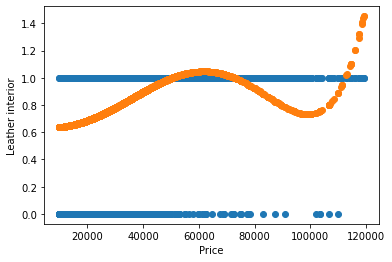

In [219]:
#Implememntando a regressão linear
modelo_inicial = LinearRegression()



#Ajuste dos dados
modelo_inicial.fit(polinomial_X1, Y1)



#Guardando a variável
Y_pred2 = modelo_inicial.predict(polinomial_X1)



#Plot do modelo
plt.scatter(X1, Y1)
plt.xlabel("Price")
plt.ylabel("Leather interior")
plt.scatter(X1, Y_pred2)

In [220]:
#Cálculo do root mean squared
primeiro_erro = (mean_squared_error(Y1, Y_pred2))**0.5



#Cálculo do coeficiente de determinação
media_Y1 = [Y1.mean()]*len(Y1)



r2 = 1 - (mean_squared_error(Y1, Y_pred2) / mean_squared_error(Y1, media_Y1))



xx = 0.022457*100



print("Obtivemos um RMS de Treinamento de valor: {0:.5}".format(primeiro_erro))
print("Obtivemos um R² (Coeficiente de Determinação) de valor: {0:.5}%".format(xx))

Obtivemos um RMS de Treinamento de valor: 0.42241
Obtivemos um R² (Coeficiente de Determinação) de valor: 2.2457%
